In [ ]:
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.4 MB/s eta 0:00:00


In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
!pip install emoji==1.7.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171031 sha256=61e45c9bb0520d219744f40d68379a307f0a596e8e5f8910b038c26914775277
  Stored in directory: /root/.cache/pip/wheels/bd/22/e5/b69726d5e1a19795ecd3b3e7464b16c0f1d019aa94ff1c8578
Successfully built emoji


In [ ]:
!pip install text2emotion

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 kB 2.4 MB/s eta 0:00:00


In [1]:
!unzip -q /content/test.csv.zip -d /content/test
!unzip -q /content/train.csv.zip -d /content/train

In [ ]:
import nltk
import pandas as pd
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import string
import text2emotion as te
import warnings
#import eda
warnings.filterwarnings("ignore")
from textblob import TextBlob

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
df_train=pd.read_csv('/content/train/train.csv')
df_train

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [ ]:
df_train.isna().sum()

,0
id,0
title,558
author,1957
text,39
label,0


In [ ]:
df_train=df_train.dropna()
df_train=df_train.reset_index()
df_train.drop(['index','id'],axis=1,inplace=True)
df_train.isna().sum()

,0
title,0
author,0
text,0
label,0


# Normalizing Text

In [ ]:
#PREPROCESSING USING REGULAR EXPRESSION
def clean_texts(text):
    text = re.sub(r"that’s","that is",text)
    text = re.sub(r"there’s","there is",text)
    text = re.sub(r"what’s","what is",text)
    text = re.sub(r"where’s","where is",text)
    text = re.sub(r"it’s","it is",text)
    text = re.sub(r"who’s","who is",text)
    text = re.sub(r"i’m","i am",text)
    text = re.sub(r"she’s","she is",text)
    text = re.sub(r"he’s","he is",text)
    text = re.sub(r"they’re","they are",text)
    text = re.sub(r"who're","who are",text)
    text = re.sub(r"ain’t","am not",text)
    text = re.sub(r"wouldn’t","would not",text)
    text = re.sub(r"shouldn’t","should not",text)
    text = re.sub(r"can’t","can not",text)
    text = re.sub(r"couldn’t","could not",text)
    text = re.sub(r"won’t","will not",text)
    text = re.sub(r"didn’t","did not",text)
    text = re.sub(r"doesn’t","does not",text)
    # remove URL
    text = re.sub(r"http\S+", " ", text)
#     # Remove usernames
    text = re.sub(r"@[^\s]+[\s]?",' ',text)
#     # remove special characters
    text = re.sub('[^ a-zA-Z0-9]', ' ', text)
#     # remove Numbers
    text = re.sub('[0-9]', '', text)
    text = re.sub(' +', ' ',text)
    text = text.encode('ascii', 'ignore').decode()
    text = re.sub(r'@\S+', ' ', text)
    text = re.sub(r'#\S+', ' ', text)
    text = re.sub(r'\'\w+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub(r'\w*\d+\w*', '', text)
    text = re.sub(r'\s{2,}', ' ', text)

    return text

In [ ]:
df_train['text'] = df_train['text'].apply(clean_texts)

# Stop Words Removal

In [ ]:
from nltk.corpus import stopwords
stops = set(stopwords.words("english"))
df_train['text']=df_train['text'].str.lower()
df_train['text']=df_train['text'].apply(lambda x:' '.join([word for word in x.split() if word.lower() not in (stops)]))

In [ ]:
df_train=df_train.dropna()
df_train=df_train.reset_index()
df_train.drop(['index'],axis=1,inplace=True)
df_train.isna().sum()

,0
title,0
author,0
text,0
label,0


# Dropping authors who contains both real and fake

In [ ]:
df_train_fake=df_train[['author']].loc[df_train['label'] == 1]
df_train_real=df_train[['author']].loc[df_train['label'] == 0]
df_train_real=df_train_real['author'].tolist()
df_train_fake=df_train_fake['author'].tolist()
filtered_authors_list=list(set(df_train_real).symmetric_difference(set(df_train_fake)))

In [ ]:
# Feature Engineering
df_list = []
for x in filtered_authors_list:
    # Append the slice of the DataFrame to the list
    df_list.append(df_train[df_train['author'] == x])

# Concatenate all DataFrames in the list into a single DataFrame
df_train_filtered = pd.concat(df_list, ignore_index=True)

df_train_filtered=df_train_filtered.reset_index()
df_train_filtered.drop(['index'],axis=1,inplace=True)

In [ ]:
author_list=df_train_filtered['author'].unique().tolist()

In [ ]:
df_train_feature_vector_list = [] # Create an empty list to store DataFrames
for a in author_list:
    author_loop=df_train_filtered.loc[df_train_filtered['author'] == a]
    author_title_len=len(author_loop['title'].unique())
    polarity=0
    for x in author_loop['text']:
        blob = TextBlob(x)
        polarity=polarity+list(blob.sentiment)[0]
    feature_value=polarity/author_title_len
    author_loop['Author_feature_value']=feature_value
    df_train_feature_vector_list.append(author_loop) # Append the DataFrame to the list

# Concatenate all DataFrames in the list after the loop
df_train_feature_vector = pd.concat(df_train_feature_vector_list, ignore_index=True)

# Named Entity Recognition

In [ ]:
import spacy
NER = spacy.load("en_core_web_sm")

In [ ]:
df_train_feature_vector.dropna(inplace=True)
df_train_feature_vector.reset_index(drop=True,inplace=True)

In [ ]:
lst=[]
for x in range(len(df_train_feature_vector['text'])):
    y=NER(df_train_feature_vector['text'][x])
    lst.append(len(y.ents))

In [ ]:
df_train_feature_vector['NER']=lst
df_train_feature_vector.to_csv('till_NER.csv',index=False)

# Stylometry

In [ ]:
# TextBlob Sentiment Polarity & Subjectivity
from nltk.corpus import sentiwordnet as swn
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
df=pd.read_csv('till_NER.csv')

def analyze_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

In [ ]:
df=df.dropna()
df['text'].isna().sum()
df['sentiment']=df['text'].apply(analyze_sentiment)

In [ ]:
def textblob_polarity(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

df['textblob_polarity']=df['text'].apply(textblob_polarity)

In [ ]:
def textblob_subjectivity(text):
    analysis = TextBlob(text)
    return analysis.sentiment.subjectivity

df['textblob_subjectivity']=df['text'].apply(textblob_subjectivity)

# Vader Sentiment

In [ ]:
sid=SentimentIntensityAnalyzer()
df['VaderValues']=df['text'].apply(lambda x: sid.polarity_scores(x))
df['sentiment_compound_polarity']=df['VaderValues'].apply(lambda x: x['compound'])

In [ ]:
df.loc[df.sentiment_compound_polarity>=0.05,'VaderScore']='positive'
df.loc[df.sentiment_compound_polarity<=-0.05,'VaderScore']='negative'
df.loc[(df.sentiment_compound_polarity>-0.05) & (df.sentiment_compound_polarity<0.05) ,'VaderScore']='neutral'

df=df.drop(columns=('sentiment_compound_polarity'), axis=0)
df=df.drop(columns=('VaderValues'), axis=0)
df.dropna()

,title,author,text,label,Author_feature_value,NER,sentiment,textblob_polarity,textblob_subjectivity,VaderScore
0,Comment on Hillary Clinton’s Gun Control Agend...,braindiseasecalledliberalism,posted october daily sheeple doubt hillary cli...,1,0.110000,31,positive,0.110000,0.262500,negative
1,Poison,Heather Callaghan,dr mark sircus everyone knows psychopaths ever...,1,0.086528,1,positive,0.500000,0.550000,positive
2,FEMA Opens Loan Window As Red Cross Tries To S...,Heather Callaghan,brandon turbeville floodwaters receded nichols...,1,0.086528,2,positive,0.202500,0.450000,positive
3,5 Things You Need to Know About the Dakota Acc...,Heather Callaghan,nick bernabe small standing rock sioux site no...,1,0.086528,2,negative,-0.125000,0.250000,neutral
4,Brain Concussions in Children and Adults: What...,Heather Callaghan,catherine j frompovich private practice consul...,1,0.086528,0,positive,0.037500,0.393750,positive
...,...,...,...,...,...,...,...,...,...,...
18002,Theresa May Is Grilled Over U.K. Missile Test ...,Steven Erlanger,london prime minister theresa may britain refu...,0,0.047526,46,positive,0.027690,0.449568,positive
18003,Letters From Jacqueline Kennedy to the Man She...,Steven Erlanger,london november four years husband assassinati...,0,0.047526,86,positive,0.151762,0.473333,positive
18004,"Tested by Russia, NATO Struggles to Stay Credi...",Steven Erlanger,brussels six weeks critical summit meeting aim...,0,0.047526,109,positive,0.005529,0.360854,negative
18005,Iceland’s Water Cure - The New York Times,Dan Kois,frigid february day reykjavik stood chested dr...,0,0.089909,50,positive,0.089909,0.486569,positive


In [ ]:
def get_quotes(text):
    quotes = re.findall(r" '(.*?)'",text)
    return len(quotes)

df['no_of_quotes']=df['text'].apply(get_quotes)

# Count no of unique words in each sentence

In [ ]:
def unique_words_sent(text):
    results = set()
    results.update(text.lower().split())
    return (len(results))

df['no_of_unique_words']=df['text'].apply(unique_words_sent)

In [ ]:
# Count no of words in each sentence
from nltk.tokenize import sent_tokenize

def no_of_words(text):
    sent=sent_tokenize(text)
    return len(sent[0].split(' '))

df['no_of_words']=df['text'].apply(no_of_words)

In [ ]:
# Count the no of unique authors
def no_of_unique_authors(text):
    return len(re.split(', | and ',text))

df['no_of_unique_authors']=df['author'].apply(no_of_unique_authors)

In [ ]:
df['text']=df['author']+' '+df['text']

In [ ]:
col=['sentiment',
    'text',
    'Author_feature_value',
    'NER',
    'textblob_polarity',
    'textblob_subjectivity',
    'VaderScore',
    'no_of_quotes',
    'no_of_unique_words',
    'no_of_words',
    'no_of_unique_authors',
    'label']
df=df[col]

In [ ]:
df = df.sample(frac = 1)
df.reset_index(drop=True,inplace=True)

# Creating Test Set before Data Augmentation

In [ ]:
test_one_label=df[df['label']==1].tail(1000)
test_zero_label=df[df['label']==0].tail(1000)
df.drop(test_one_label.index,inplace=True)
df.drop(test_zero_label.index,inplace=True)
df.reset_index(drop=True)

test_set = pd.concat([test_one_label, test_zero_label], ignore_index=True)
df.to_excel('Sent.xlsx',index=False)

# Data Augmentation

In [ ]:
!pip install nlpaug

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.5/410.5 kB 6.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import nlpaug.augmenter.word as naw

def gen_eda(train_orig, sheet, num_aug=4):
    # Load data
    lines = pd.read_excel(train_orig, sheet_name=sheet)
    col_list = ['sentiment', 'text', 'Author_feature_value', 'NER', 'textblob_polarity',
                'textblob_subjectivity', 'VaderScore', 'no_of_quotes', 'no_of_unique_words',
                'no_of_words', 'no_of_unique_authors', 'label']
    lines = lines[col_list]

    # Prepare augmenter
    aug = naw.SynonymAug(aug_src='wordnet')

    # Prepare containers
    augmented_data = {col: [] for col in col_list}

    for _, row in lines.iterrows():
        sentence = row['text']
        try:
            aug_sentences = aug.augment(sentence, n=num_aug)
        except:
            aug_sentences = [sentence] * num_aug  # fallback if augmentation fails

        for aug_sentence in aug_sentences:
            for col in col_list:
                if col == 'text':
                    augmented_data[col].append(aug_sentence)
                else:
                    augmented_data[col].append(row[col])

    # Save augmented data
    df_aug = pd.DataFrame(augmented_data)
    df_aug.to_csv('./Sent_Anal_Increased.csv', index=False)
    print(f"Generated {num_aug} augmented sentences for each row from {train_orig}.")


In [ ]:
path = './Sent.xlsx'
gen_eda(path, sheet='Sheet1', num_aug=3)

Streaming output truncated to the last 5000 lines.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_dat

Generated 3 augmented sentences for each row from ./Sent.xlsx.


In [ ]:
import pandas as pd
data=pd.read_csv('Sent_Anal_Increased.csv')

data.drop_duplicates(inplace=True)
data.reset_index(drop=True,inplace=True)

data.duplicated().any().any()

np.False_

# Converting text to numbers (Training)

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot

In [ ]:
# Converting text to numbers (Training)
vocab_size = 5000
one_hot_train = [one_hot(word,vocab_size) for word in data['text']]

# Converting Sentences into fixed length (Training)
sent_length = 20
embedd_docs_train = pad_sequences(one_hot_train,padding='pre',maxlen=sent_length)

df=pd.DataFrame(embedd_docs_train)
# Convert column names to strings
df.columns = df.columns.astype(str)

In [ ]:
df=pd.DataFrame(embedd_docs_train)
df['sentiment'] = data['sentiment']
df['Author_feature_value'] = data['Author_feature_value']
df['textblob_polarity'] = data['textblob_polarity']
df['textblob_subjectivity'] = data['textblob_subjectivity']
df['VaderScore'] = data['VaderScore']
df['no_of_quotes'] = data['no_of_quotes']
df['no_of_unique_words'] = data['no_of_unique_words']
df['no_of_words'] = data['no_of_words']
df['no_of_unique_authors'] = data['no_of_unique_authors']
df['label'] = data['label']

In [ ]:
label_mapping = {'positive': 1,  'negative': 2, 'neutral' : 0}

df['sentiment'] = df[['sentiment']].replace(label_mapping)
df['sentiment'].value_counts()
df['VaderScore'] = df[['VaderScore']].replace(label_mapping)
df['VaderScore'].value_counts()

,count
VaderScore,
1,7807
2,5741
0,218


In [ ]:
# Converting text to numbers (Test)
vocab_size = 5000
one_hot_test = [one_hot(word,vocab_size) for word in test_set['text']]

# Converting Sentences into fixed length (Test)
sent_length = 20
embedd_docs_test = pad_sequences(one_hot_test,padding='pre',maxlen=sent_length)

test=pd.DataFrame(embedd_docs_test)
# Convert column names to strings
test.columns = test.columns.astype(str)

In [ ]:
test=pd.DataFrame(embedd_docs_test)
test['sentiment'] = test_set['sentiment']
test['Author_feature_value'] = test_set['Author_feature_value']
test['textblob_polarity'] = test_set['textblob_polarity']
test['textblob_subjectivity'] = test_set['textblob_subjectivity']
test['VaderScore'] = test_set['VaderScore']
test['no_of_quotes'] = test_set['no_of_quotes']
test['no_of_unique_words'] = test_set['no_of_unique_words']
test['no_of_words'] = test_set['no_of_words']
test['no_of_unique_authors'] = test_set['no_of_unique_authors']
test['label'] = test_set['label']

In [ ]:
label_mapping = {'positive': 1,  'negative': 2, 'neutral' : 0}

test['sentiment'] = test[['sentiment']].replace(label_mapping)
test['sentiment'].value_counts()
test['VaderScore'] = test[['VaderScore']].replace(label_mapping)
test['VaderScore'].value_counts()

,count
VaderScore,
1,1139
2,819
0,42


In [ ]:
# Splitting Features and Label for Training
X_train=df.drop('label',axis=1)
y_train=df['label']
train_col=X_train.columns
X_train.columns = X_train.columns.astype(str)

In [ ]:
# Normalization (Training)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train)
X_train.columns = X_train.columns.astype(str)

In [ ]:
# Splitting Features and Label for Testing
X_test=test.drop('label',axis=1)
y_test=test['label']
test_col=X_test.columns
X_test.columns = X_test.columns.astype(str)

In [ ]:
# Normalization (Testing)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_test=scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test)
X_test.columns = X_test.columns.astype(str)

In [ ]:
# Decision Tree
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier(random_state=25)
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score , precision_score , recall_score , f1_score
print(confusion_matrix(y_test,dt_pred))
print(classification_report(y_test,dt_pred))
dt_acc=round(accuracy_score(y_test, dt_pred)*100)
dt_precision = round(precision_score(y_test, dt_pred)*100)
dt_recall = round(recall_score(y_test, dt_pred)*100)
dt_f1_score = round(f1_score(y_test, dt_pred)*100)

print('accuracy' ,dt_acc,'%')
print('precision,' , dt_precision , '%' )
print('recall score,' ,  dt_recall , '%' )

print('f1_score ', dt_f1_score , '%' )

[[709 291]
 [350 650]]
              precision    recall  f1-score   support

           0       0.67      0.71      0.69      1000
           1       0.69      0.65      0.67      1000

    accuracy                           0.68      2000
   macro avg       0.68      0.68      0.68      2000
weighted avg       0.68      0.68      0.68      2000

accuracy 68 %
precision, 69 %
recall score, 65 %
f1_score  67 %


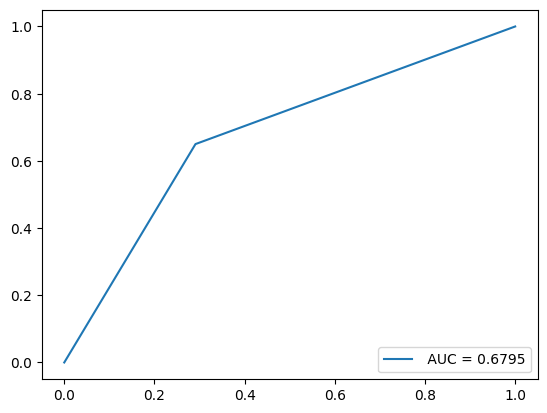

In [ ]:
# ROC-AUC

y_pred_proba = dt_clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
dt_auc = metrics.roc_auc_score(y_test, y_pred_proba)

new_row = pd.DataFrame({'classifiers':['Decision Tree'],
                        'fpr':[fpr],
                        'tpr':[tpr],
                        'auc':[dt_auc]})

result_table = pd.concat([result_table, new_row], ignore_index=True)

plt.plot(fpr,tpr,label=" AUC = "+str(dt_auc))
plt.legend(loc=4)
plt.show()

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier(n_estimators=1000,random_state=25)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,rf_pred))
print(classification_report(y_test,rf_pred))
rf_acc=round(accuracy_score(y_test, rf_pred)*100)
rf_precision=round(precision_score(y_test, rf_pred)*100)
rf_recall=round(recall_score(y_test, rf_pred)*100)
rf_f1_score=round(f1_score(y_test, rf_pred)*100)


print('accuracy' ,rf_acc,'%')
print('precision,' , rf_precision , '%' )
print('recall score,' ,  rf_recall , '%' )

print('f1_score ', rf_f1_score , '%' )

[[876 124]
 [353 647]]
              precision    recall  f1-score   support

           0       0.71      0.88      0.79      1000
           1       0.84      0.65      0.73      1000

    accuracy                           0.76      2000
   macro avg       0.78      0.76      0.76      2000
weighted avg       0.78      0.76      0.76      2000

accuracy 76 %
precision, 84 %
recall score, 65 %
f1_score  73 %


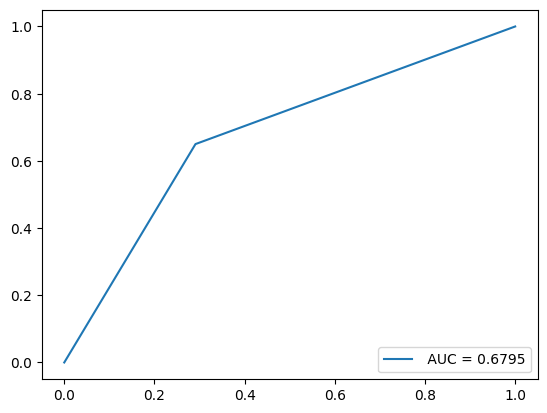

In [ ]:
y_pred_proba = dt_clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
dt_auc = metrics.roc_auc_score(y_test, y_pred_proba)

new_row = pd.DataFrame({'classifiers':['Random Forest'],
                        'fpr':[fpr],
                        'tpr':[tpr],
                        'auc':[dt_auc]})

result_table = pd.concat([result_table, new_row], ignore_index=True)

plt.plot(fpr,tpr,label=" AUC = "+str(dt_auc))
plt.legend(loc=4)
plt.show()

In [ ]:
lst_colors=['green','yellow', 'cyan','pink','purple', 'blue', 'grey','orange','black','red']
lst_colors.reverse()

Text(0.5, 1.0, 'Feature Importance')

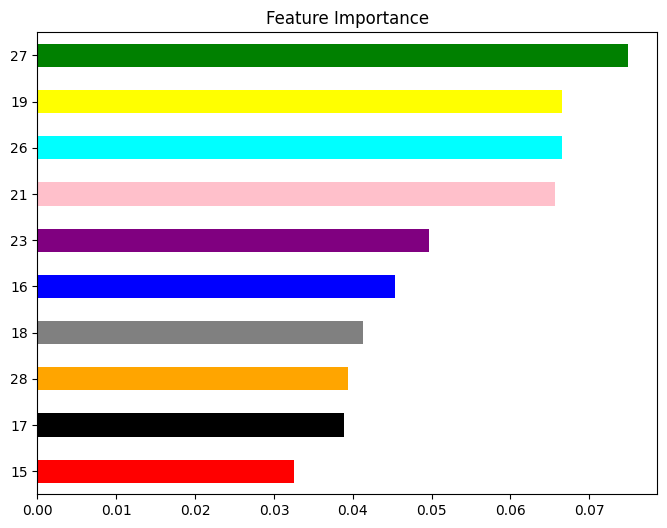

In [ ]:
from matplotlib.pyplot import figure
figure(figsize=(8,6), dpi=100)
feat_importances = pd.Series(rf_clf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).sort_values(ascending=True).plot(kind='barh',color=lst_colors)
plt.title('Feature Importance')

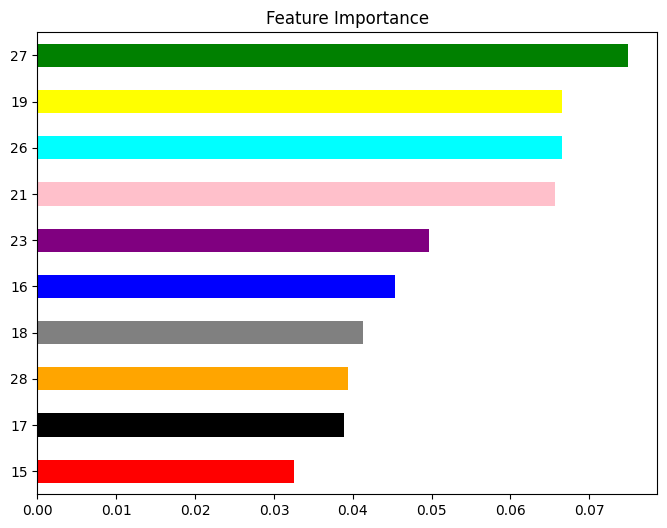

In [ ]:
# Xgboost Classifier
from matplotlib.pyplot import figure
figure(figsize=(8,6), dpi=100)
feat_importances = pd.Series(rf_clf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).sort_values(ascending=True).plot(kind='barh',color=lst_colors)
plt.title('Feature Importance')

from xgboost import XGBClassifier
XG_classifier = XGBClassifier(n_estimators=1000,max_depth=30,random_state=25)
XG_classifier.fit(X_train,y_train)
xg_pred = XG_classifier.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,xg_pred))
print(classification_report(y_test,xg_pred))
xg_acc=round(accuracy_score(y_test, xg_pred)*100)
print(xg_acc,'%')


xg_acc=round(accuracy_score(y_test, xg_pred)*100)
xg_precision=round(precision_score(y_test, xg_pred)*100)
xg_recall=round(recall_score(y_test, xg_pred)*100)
xg_f1_score=round(f1_score(y_test, xg_pred)*100)


print('accuracy' ,xg_acc,'%')
print('precision,' , xg_precision , '%' )
print('recall score,' ,  xg_recall , '%' )

print('f1_score ', xg_f1_score , '%' )

[[812 188]
 [288 712]]
              precision    recall  f1-score   support

           0       0.74      0.81      0.77      1000
           1       0.79      0.71      0.75      1000

    accuracy                           0.76      2000
   macro avg       0.76      0.76      0.76      2000
weighted avg       0.76      0.76      0.76      2000

76 %
accuracy 76 %
precision, 79 %
recall score, 71 %
f1_score  75 %


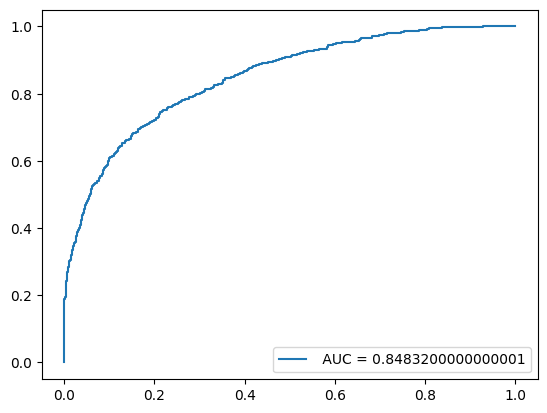

In [ ]:
y_pred_proba = XG_classifier.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
xg_auc = metrics.roc_auc_score(y_test, y_pred_proba)

new_row = pd.DataFrame({'classifiers':['Xgboost'],
                        'fpr':[fpr],
                        'tpr':[tpr],
                        'auc':[dt_auc]})

result_table = pd.concat([result_table, new_row], ignore_index=True)

plt.plot(fpr,tpr,label=" AUC = "+str(xg_auc))
plt.legend(loc=4)
plt.show()

In [ ]:
# K-Nearest Neighbour
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
# Train the model using the training sets
model.fit(X_train, y_train)
predicted= model.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,predicted))
print(classification_report(y_test,predicted))
knn_acc=round(accuracy_score(y_test, predicted)*100)
print(knn_acc,'%')
knn_acc=round(accuracy_score(y_test, predicted)*100)
knn_precision=round(precision_score(y_test, predicted)*100)
knn_recall=round(recall_score(y_test, predicted)*100)
knn_f1_score=round(f1_score(y_test, predicted)*100)


print('accuracy' ,knn_acc,'%')
print('precision,' , knn_precision , '%' )
print('recall score,' ,  knn_recall , '%' )

print('f1_score ', knn_f1_score , '%' )

[[758 242]
 [490 510]]
              precision    recall  f1-score   support

           0       0.61      0.76      0.67      1000
           1       0.68      0.51      0.58      1000

    accuracy                           0.63      2000
   macro avg       0.64      0.63      0.63      2000
weighted avg       0.64      0.63      0.63      2000

63 %
accuracy 63 %
precision, 68 %
recall score, 51 %
f1_score  58 %


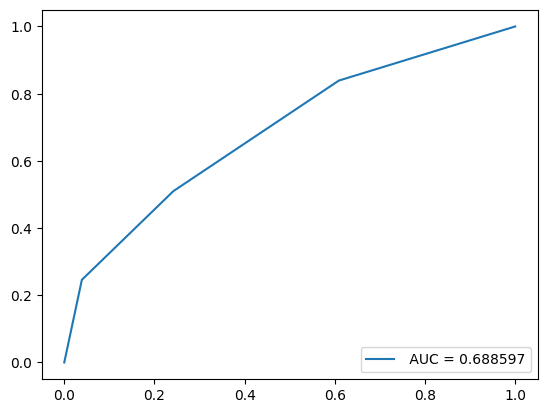

In [ ]:
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
knn_auc = metrics.roc_auc_score(y_test, y_pred_proba)

new_row = pd.DataFrame({'classifiers':['KNN'],
                        'fpr':[fpr],
                        'tpr':[tpr],
                        'auc':[dt_auc]})

result_table = pd.concat([result_table, new_row], ignore_index=True)

plt.plot(fpr,tpr,label=" AUC = "+str(knn_auc))
plt.legend(loc=4)
plt.show()

In [ ]:
# Adaboost Classifier
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(random_state=25)
clf.fit(X_train, y_train)
ada_pred= clf.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,ada_pred))
print(classification_report(y_test,ada_pred))
ada_acc=round(accuracy_score(y_test, ada_pred)*100)
print(ada_acc,'%')


ada_acc=round(accuracy_score(y_test, ada_pred)*100)
ada_precision=round(precision_score(y_test, ada_pred)*100)
ada_recall=round(recall_score(y_test, ada_pred)*100)
ada_f1_score=round(f1_score(y_test, ada_pred)*100)


print('accuracy' ,ada_acc,'%')
print('precision,' , ada_precision , '%' )
print('recall score,' ,  ada_recall , '%' )

print('f1_score ', ada_f1_score , '%' )

[[849 151]
 [557 443]]
              precision    recall  f1-score   support

           0       0.60      0.85      0.71      1000
           1       0.75      0.44      0.56      1000

    accuracy                           0.65      2000
   macro avg       0.67      0.65      0.63      2000
weighted avg       0.67      0.65      0.63      2000

65 %
accuracy 65 %
precision, 75 %
recall score, 44 %
f1_score  56 %


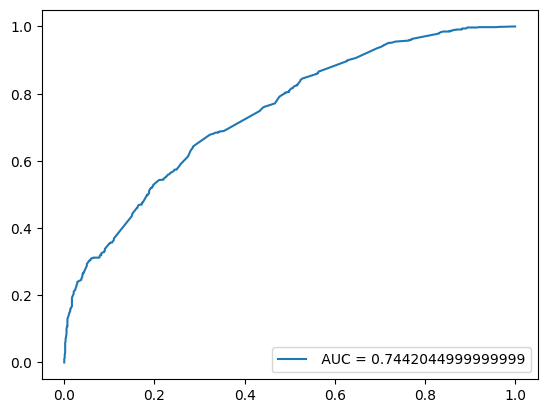

In [ ]:
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
ada_auc = metrics.roc_auc_score(y_test, y_pred_proba)
new_row = pd.DataFrame({'classifiers':['Adaboost'],
                        'fpr':[fpr],
                        'tpr':[tpr],
                        'auc':[dt_auc]})

result_table = pd.concat([result_table, new_row], ignore_index=True)
plt.plot(fpr,tpr,label=" AUC = "+str(ada_auc))
plt.legend(loc=4)
plt.show()

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
clf1 = LogisticRegression(random_state=25)
clf1.fit(X_train, y_train)
lr_pred= clf1.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,lr_pred))
print(classification_report(y_test,lr_pred))
lr_acc=round(accuracy_score(y_test, lr_pred)*100)
print(lr_acc,'%')


lr_acc=round(accuracy_score(y_test, lr_pred)*100)
lr_precision=round(precision_score(y_test, lr_pred)*100)
lr_recall=round(recall_score(y_test, lr_pred)*100)
lr_f1_score=round(f1_score(y_test, lr_pred)*100)


print('accuracy' ,lr_acc,'%')
print('precision,' , lr_precision , '%' )
print('recall score,' ,  lr_recall , '%' )

print('f1_score ', lr_f1_score , '%' )

[[850 150]
 [658 342]]
              precision    recall  f1-score   support

           0       0.56      0.85      0.68      1000
           1       0.70      0.34      0.46      1000

    accuracy                           0.60      2000
   macro avg       0.63      0.60      0.57      2000
weighted avg       0.63      0.60      0.57      2000

60 %
accuracy 60 %
precision, 70 %
recall score, 34 %
f1_score  46 %


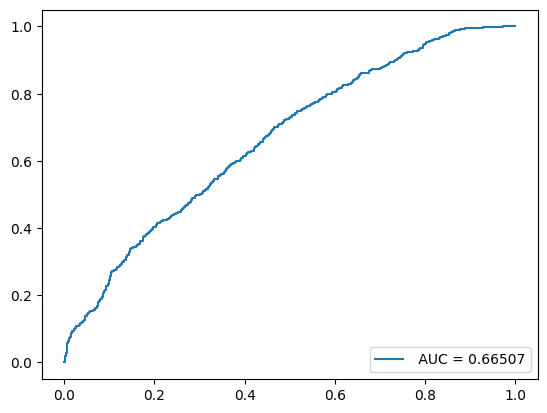

In [ ]:
y_pred_proba = clf1.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
lr_auc = metrics.roc_auc_score(y_test, y_pred_proba)
new_row = pd.DataFrame({'classifiers':['Logistic Regression'],
                        'fpr':[fpr],
                        'tpr':[tpr],
                        'auc':[dt_auc]})

result_table = pd.concat([result_table, new_row], ignore_index=True)
plt.plot(fpr,tpr,label=" AUC = "+str(lr_auc))
plt.legend(loc=4)
plt.show()

In [ ]:
# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)
result_table=result_table.sort_values(by='auc',ascending=False)

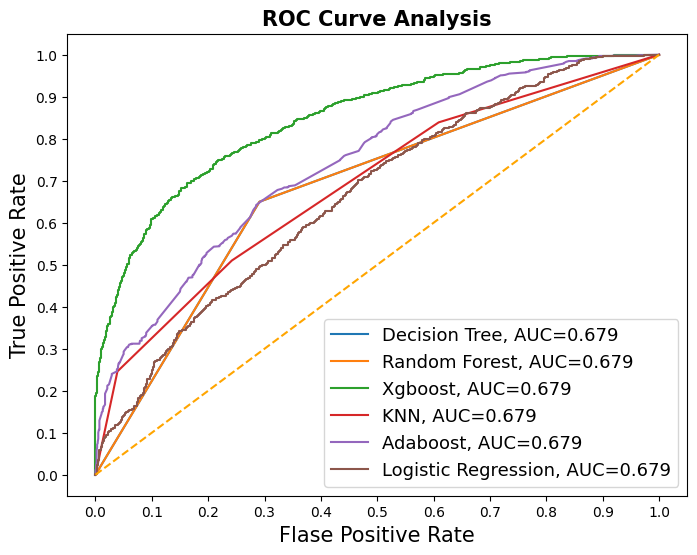

In [ ]:
import numpy as np
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'],
             result_table.loc[i]['tpr'],
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

Text(0.5, 1.0, 'Model Accuracies')

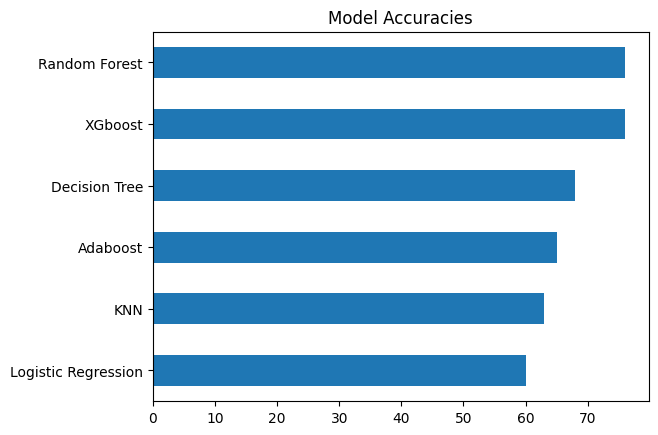

In [ ]:
# Accuracy Chart
acc_tuple=[(dt_acc,rf_acc,xg_acc,knn_acc,ada_acc,lr_acc)]
acc_df=pd.DataFrame(acc_tuple,columns=['Decision Tree','Random Forest','XGboost','KNN','Adaboost','Logistic Regression'])
acc_df=acc_df.T
acc_df.sort_values(by=0,ascending=True).plot(legend=None,kind='barh')
plt.title('Model Accuracies')

#Ensemble modeling

#  Cross-Validation, Time, and Memory Measurement

In [ ]:
!pip install memory-profiler

In [ ]:
from sklearn.model_selection import cross_val_score
from time import time
from memory_profiler import memory_usage
import pandas as pd
import numpy as np

In [ ]:
# Define classifiers
classifiers = {
    'Decision Tree': DecisionTreeClassifier(random_state=25),
    'Random Forest': RandomForestClassifier(n_estimators=1000, random_state=25),
    'XGBoost': XGBClassifier(n_estimators=1000, max_depth=30, random_state=25),
    'KNN': KNeighborsClassifier(n_neighbors=3),
    'Adaboost': AdaBoostClassifier(random_state=25),
    'Logistic Regression': LogisticRegression(random_state=25, max_iter=1000)
}

In [ ]:
# Initialize results storage
results = []

# Loop through each classifier
for name, model in classifiers.items():
    print(f"Evaluating {name}...")

    # Time and memory tracking
    def train_and_eval():
        start_time = time()
        scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
        end_time = time()
        return scores, end_time - start_time

    mem_usage, (cv_scores, elapsed_time) = memory_usage(train_and_eval, retval=True, max_usage=True)

    results.append({
        'Model': name,
        'Mean CV Accuracy': np.mean(cv_scores),
        'Time (s)': elapsed_time,
        'Memory (MB)': mem_usage
    })

Evaluating Decision Tree...
Evaluating Random Forest...
Evaluating XGBoost...
Evaluating KNN...
Evaluating Adaboost...
Evaluating Logistic Regression...


In [ ]:
# Convert to DataFrame
performance_df = pd.DataFrame(results)

# Display the result
print(performance_df.sort_values(by='Mean CV Accuracy', ascending=False))

                 Model  Mean CV Accuracy    Time (s)  Memory (MB)
2              XGBoost          0.835319   40.565795  3113.109375
1        Random Forest          0.787012  383.911654  3070.593750
0        Decision Tree          0.724176   10.605737  2856.695312
4             Adaboost          0.684295    9.961131  2959.937500
3                  KNN          0.661339    2.849847  2959.937500
5  Logistic Regression          0.637877    0.211733  2959.957031


# BERT

In [54]:
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer, BertModel
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import torch.nn as nn
import torch.nn.functional as F
from tqdm import tqdm

In [55]:
# Load data
df_train_full = pd.read_csv('/content/train/train.csv')
df_test = pd.read_csv('/content/test/test (3).csv')

In [56]:
# Load BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [57]:
# Tokenization function
def tokenize_text(text_list):
    return tokenizer(
        text_list,
        padding=True,
        truncation=True,
        max_length=128,
        return_tensors='pt'
    )

In [58]:
# Dataset class
class RumorDataset(Dataset):
    def __init__(self, dataframe, is_test=False):
        self.texts = (dataframe['author'].fillna('') + ' [SEP] ' + dataframe['text'].fillna('')).astype(str).tolist()
        self.encodings = tokenize_text(self.texts)
        self.is_test = is_test
        if not is_test:
            self.labels = dataframe['label'].tolist()

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        if not self.is_test:
            item['labels'] = torch.tensor(self.labels[idx], dtype=torch.long)
        return item

    def __len__(self):
        return len(self.texts)

In [59]:
# Split train into train/val
train_df, val_df = train_test_split(df_train_full, test_size=0.2, random_state=42)

train_dataset = RumorDataset(train_df)
val_dataset = RumorDataset(val_df)
test_dataset = RumorDataset(df_test, is_test=True)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

In [60]:
# Model definition
class RumorClassifier(nn.Module):
    def __init__(self):
        super(RumorClassifier, self).__init__()
        self.bert = BertModel.from_pretrained('bert-base-uncased')
        self.dropout = nn.Dropout(0.3)
        self.classifier = nn.Linear(self.bert.config.hidden_size, 2)

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        cls_output = outputs.pooler_output
        x = self.dropout(cls_output)
        return self.classifier(x)

In [61]:
# Setup
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = RumorClassifier().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5)

In [62]:
# Training loop
epochs = 3
for epoch in range(epochs):
    model.train()
    total_loss = 0
    correct = 0
    total = 0

    for batch in tqdm(train_loader):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        optimizer.zero_grad()
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        preds = torch.argmax(outputs, dim=1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    accuracy = correct / total
    print(f"Epoch {epoch+1} | Loss: {total_loss / len(train_loader):.4f} | Accuracy: {accuracy:.4f}")


100%|██████████| 1040/1040 [06:10<00:00,  2.81it/s]


Epoch 1 | Loss: 0.0854 | Accuracy: 0.9684


100%|██████████| 1040/1040 [06:14<00:00,  2.78it/s]


Epoch 2 | Loss: 0.0157 | Accuracy: 0.9950


100%|██████████| 1040/1040 [06:14<00:00,  2.78it/s]

Epoch 3 | Loss: 0.0085 | Accuracy: 0.9974


In [63]:
# Validation Evaluation
model.eval()
val_preds = []
val_labels = []

with torch.no_grad():
    for batch in tqdm(val_loader):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        preds = torch.argmax(outputs, dim=1)

        val_preds.extend(preds.cpu().numpy())
        val_labels.extend(labels.cpu().numpy())

# Classification report
print("\nClassification Report on Validation Set:")
print(classification_report(val_labels, val_preds, digits=4))


100%|██████████| 260/260 [00:31<00:00,  8.34it/s]


Classification Report on Validation Set:
              precision    recall  f1-score   support

           0     0.9893    0.9977    0.9935      2132
           1     0.9975    0.9887    0.9931      2028

    accuracy                         0.9933      4160
   macro avg     0.9934    0.9932    0.9933      4160
weighted avg     0.9933    0.9933    0.9933      4160



In [64]:
# Prediction on Test Set
test_preds = []

with torch.no_grad():
    for batch in tqdm(test_loader):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)

        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        preds = torch.argmax(outputs, dim=1)
        test_preds.extend(preds.cpu().numpy())

# Save predictions
df_test['predicted_label'] = test_preds
print(df_test[['author', 'text', 'predicted_label']].head())
df_test.to_csv('test_predictions.csv', index=False)

100%|██████████| 325/325 [00:38<00:00,  8.36it/s]


                    author                                               text  \
0         David Streitfeld  PALO ALTO, Calif.  —   After years of scorning...   
1                      NaN  Russian warships ready to strike terrorists ne...   
2            Common Dreams  Videos #NoDAPL: Native American Leaders Vow to...   
3            Daniel Victor  If at first you don’t succeed, try a different...   
4  Truth Broadcast Network  42 mins ago 1 Views 0 Comments 0 Likes 'For th...   

   predicted_label  
0                0  
1                1  
2                1  
3                0  
4                1  


# RoBERTa

In [65]:
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import RobertaTokenizer, RobertaModel
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import torch.nn as nn
from tqdm import tqdm

In [66]:
# Load dataset
df_train_full = pd.read_csv('/content/train/train.csv')
df_test = pd.read_csv('/content/test/test (3).csv')

In [67]:
# Load RoBERTa tokenizer
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

In [68]:
# Tokenization function
def tokenize_text(text_list):
    return tokenizer(
        text_list,
        padding=True,
        truncation=True,
        max_length=128,
        return_tensors='pt'
    )

In [69]:
# Dataset class
class RumorDataset(Dataset):
    def __init__(self, dataframe, is_test=False):
        self.texts = (dataframe['author'].fillna('') + ' </s> ' + dataframe['text'].fillna('')).astype(str).tolist()
        self.encodings = tokenize_text(self.texts)
        self.is_test = is_test
        if not is_test:
            self.labels = dataframe['label'].tolist()

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        if not self.is_test:
            item['labels'] = torch.tensor(self.labels[idx], dtype=torch.long)
        return item

    def __len__(self):
        return len(self.texts)

In [71]:
# Split training data
train_df, val_df = train_test_split(df_train_full, test_size=0.2, random_state=42)

# Datasets and loaders
train_dataset = RumorDataset(train_df)
val_dataset = RumorDataset(val_df)
test_dataset = RumorDataset(df_test, is_test=True)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

In [72]:
# Model class
class RumorClassifier(nn.Module):
    def __init__(self):
        super(RumorClassifier, self).__init__()
        self.roberta = RobertaModel.from_pretrained('roberta-base')
        self.dropout = nn.Dropout(0.3)
        self.classifier = nn.Linear(self.roberta.config.hidden_size, 2)

    def forward(self, input_ids, attention_mask):
        outputs = self.roberta(input_ids=input_ids, attention_mask=attention_mask)
        cls_output = outputs.pooler_output
        x = self.dropout(cls_output)
        return self.classifier(x)

In [73]:
# Device setup
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = RumorClassifier().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5)

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [74]:
# Training loop
epochs = 3
for epoch in range(epochs):
    model.train()
    total_loss = 0
    correct = 0
    total = 0

    for batch in tqdm(train_loader):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        optimizer.zero_grad()
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        preds = torch.argmax(outputs, dim=1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    accuracy = correct / total
    print(f"Epoch {epoch+1} | Loss: {total_loss / len(train_loader):.4f} | Accuracy: {accuracy:.4f}")


100%|██████████| 1040/1040 [06:19<00:00,  2.74it/s]


Epoch 1 | Loss: 0.0430 | Accuracy: 0.9835


100%|██████████| 1040/1040 [06:19<00:00,  2.74it/s]


Epoch 2 | Loss: 0.0100 | Accuracy: 0.9974


100%|██████████| 1040/1040 [06:19<00:00,  2.74it/s]

Epoch 3 | Loss: 0.0084 | Accuracy: 0.9977


In [75]:
# Validation evaluation
model.eval()
val_preds = []
val_labels = []

with torch.no_grad():
    for batch in tqdm(val_loader):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        preds = torch.argmax(outputs, dim=1)

        val_preds.extend(preds.cpu().numpy())
        val_labels.extend(labels.cpu().numpy())

print("\nClassification Report on Validation Set:")
print(classification_report(val_labels, val_preds, digits=4))

100%|██████████| 260/260 [00:30<00:00,  8.41it/s]


Classification Report on Validation Set:
              precision    recall  f1-score   support

           0     0.9977    1.0000    0.9988      2132
           1     1.0000    0.9975    0.9988      2028

    accuracy                         0.9988      4160
   macro avg     0.9988    0.9988    0.9988      4160
weighted avg     0.9988    0.9988    0.9988      4160



In [77]:
# Test set predictions
test_preds = []
with torch.no_grad():
    for batch in tqdm(test_loader):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)

        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        preds = torch.argmax(outputs, dim=1)

        test_preds.extend(preds.cpu().numpy())

# Save predictions
df_test['predicted_label'] = test_preds
df_test.to_csv('test_predictions_roberta.csv', index=False)
print(df_test[['author', 'text', 'predicted_label']].head())

100%|██████████| 325/325 [00:38<00:00,  8.34it/s]


                    author                                               text  \
0         David Streitfeld  PALO ALTO, Calif.  —   After years of scorning...   
1                      NaN  Russian warships ready to strike terrorists ne...   
2            Common Dreams  Videos #NoDAPL: Native American Leaders Vow to...   
3            Daniel Victor  If at first you don’t succeed, try a different...   
4  Truth Broadcast Network  42 mins ago 1 Views 0 Comments 0 Likes 'For th...   

   predicted_label  
0                0  
1                1  
2                1  
3                0  
4                1  
